# EPI Model
## SOCI498 Assignment 8

I do not know how to do plotting in Excel, it's much easier for me to use R. All of my assignment is in this notebook.

In [19]:
#imports
library(tidyverse)
library(dplyr)

## Problem 1

I wrote a function to find TIME_LIMIT, though I've discovered it's quite similar to what can be done in a BehaviorSpace. I chose to do this because eyeballing it wouldn't have worked well or been reliable. I used the following code and found that TIME_LIMIT should be 39.

<img src="prob1.png">

## Problem 2

I will stop the program after 39 ticks using the BehaviorSpace stop option rather than modifying the code directly.

## Problem 3

For each variable, I have made a scatterplot. The averages of each are in blue.

In [34]:
#Import each of the 6 output files from BehaviorSpace in NetLogo
POP_SIZE_RUNS <- read.csv('EX_POP-SIZE.csv', skip=6, header=TRUE)
TRANS_PROB_RUNS <- read.csv('EX_TRANS_PROB.csv', skip=6, header=TRUE)
EVOLUTION_PROB_RUNS <- read.csv('EX_EVOLUTION-PROB.csv', skip=6, header=TRUE)
DISEASE_PROB_RUNS <- read.csv('EX_DISEASE-PROB.csv', skip=6, header=TRUE)
DEGREE_RUNS <- read.csv('EX_DEGREE.csv', skip=6, header=TRUE)
EVOLUTION_INT_RUNS <- read.csv('EX_EVOLUTION-INTERVAL.csv', skip=6, header=TRUE)

In [43]:
#Group by variable of interest and mean for each to be plotted
##DEGREE
DEGREE_GROUP <- DEGREE_RUNS %>%
  group_by(DEGREE) %>%
  summarise(
    mean_20 = mean(perc.infected)
  )
##EVOLUTION_PROB
EVOLUTION_PROB_GROUP <- EVOLUTION_PROB_RUNS %>%
  group_by(EVOLUTION.PROB) %>%
  summarise(
    mean_20 = mean(perc.infected)
  )
##DISEASE_PROB
DISEASE_PROB_GROUP <- DISEASE_PROB_RUNS %>%
  group_by(DISEASE.PROB) %>%
  summarise(
    mean_20 = mean(perc.infected)
  )
##POP_SIZE
POP_SIZE_GROUP <- POP_SIZE_RUNS %>%
  group_by(POP.SIZE) %>%
  summarise(
    mean_20 = mean(perc.infected)
  )
##TRANS_PROB
TRANS_PROB_GROUP <- TRANS_PROB_RUNS %>%
  group_by(TRANS_PROB) %>%
  summarise(
    mean_20 = mean(perc.infected)
  )
##EVOLUTION_INT
EVOLUTION_INT_GROUP <- EVOLUTION_INT_RUNS %>%
  group_by(EVOLUTION.INTERVAL) %>%
  summarise(
    mean_20 = mean(perc.infected)
  )

### TRANS_PROB

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


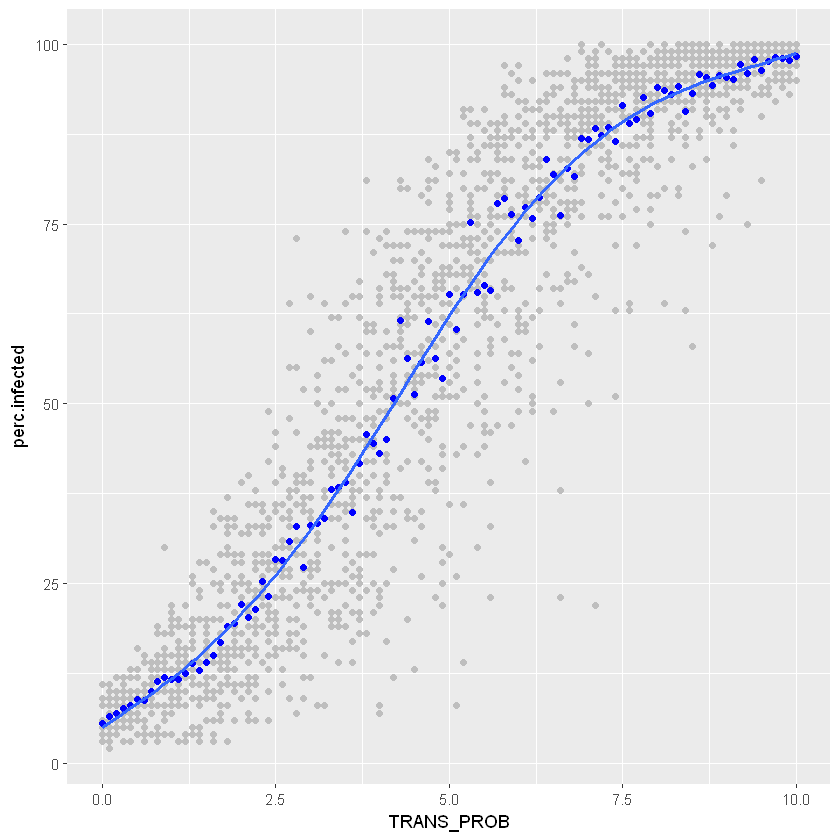

In [37]:
ggplot(TRANS_PROB_RUNS, aes(x=TRANS_PROB, y=perc.infected)) + geom_point(color="gray") + geom_point(data=TRANS_PROB_GROUP, mapping=aes(x=TRANS_PROB, y=mean_20), color="blue") + geom_smooth(se=FALSE)

This isn't surprising. When it is more likely for the disease to be transfered when risky stuff happens, more turtles get the disease. At only 10 percent probability, nearly all turtles will have the disease after just 39 ticks. 

### DISEASE-PROB

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


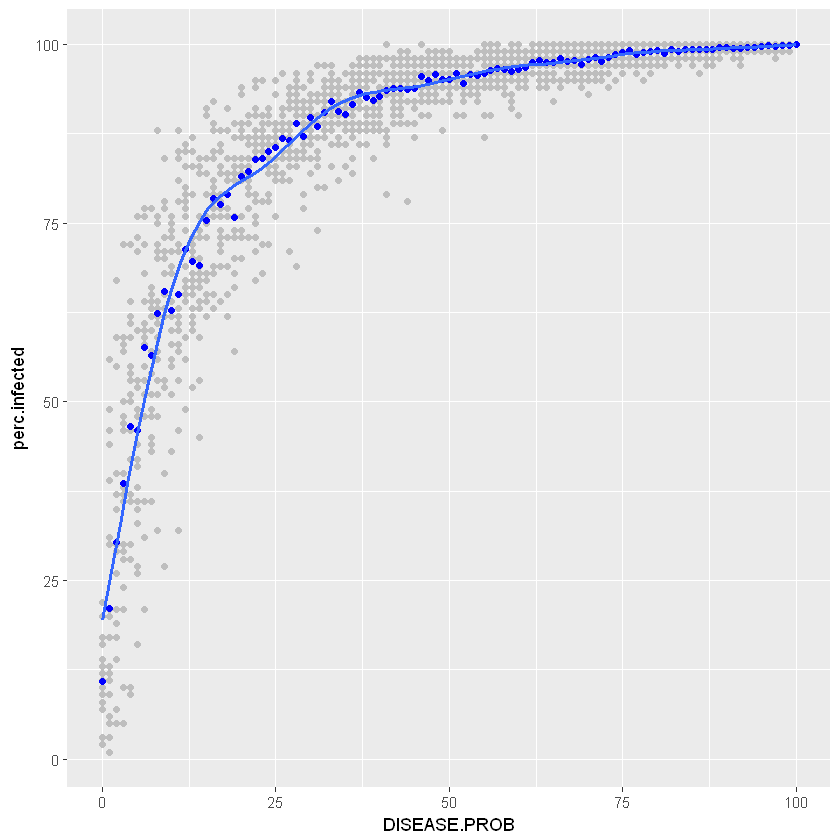

In [38]:
ggplot(DISEASE_PROB_RUNS, aes(x=DISEASE.PROB, y=perc.infected)) + geom_point(color="gray") + geom_point(data=DISEASE_PROB_GROUP, mapping=aes(x=DISEASE.PROB, y=mean_20), color="blue") + geom_smooth(se=FALSE)

Not surprisingly, the more turtles that have the disease in the first place, the more turtles will have it after 39 ticks. It's notable that the probability of transfer is much more important. When  the probablity of transfter is 4 percent, 100 percent of turtles don't have the disease until more than an 85 percent chance a turtle starts with the disease. 

### POP-SIZE

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


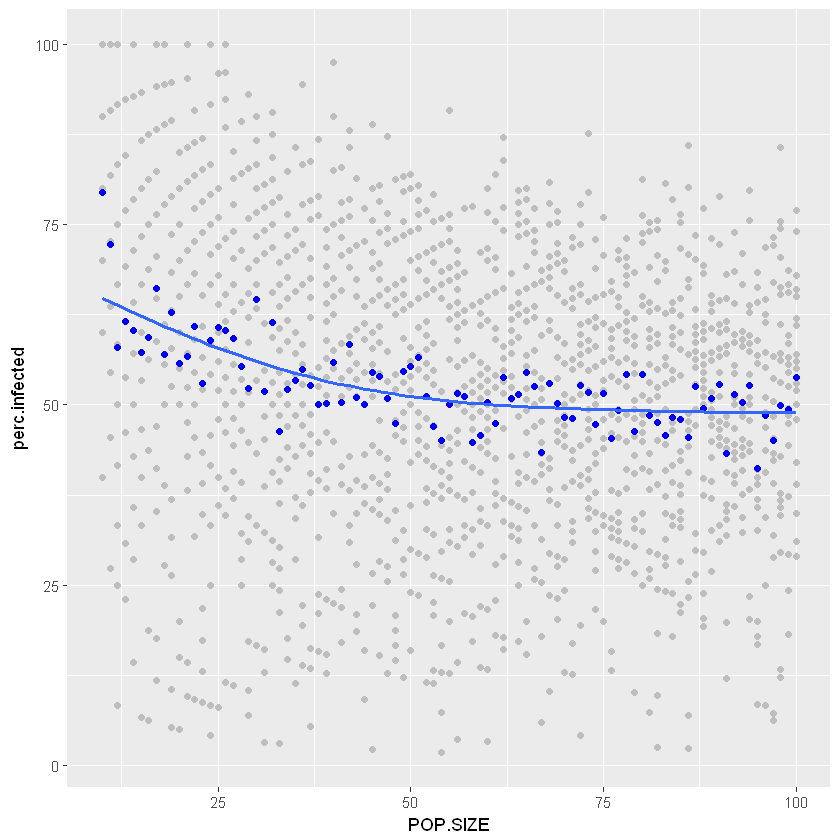

In [45]:
ggplot(POP_SIZE_RUNS, aes(x=POP.SIZE, y=perc.infected)) + geom_point(color="gray") + geom_point(data=POP_SIZE_GROUP, mapping=aes(x=POP.SIZE, y=mean_20), color="blue") + geom_smooth(se=FALSE)

This is pretty, but the size of the population has no effect on the percentage. Patterns emerge because of the size of the number we are dividing by to find percent infected.

### DEGREE

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


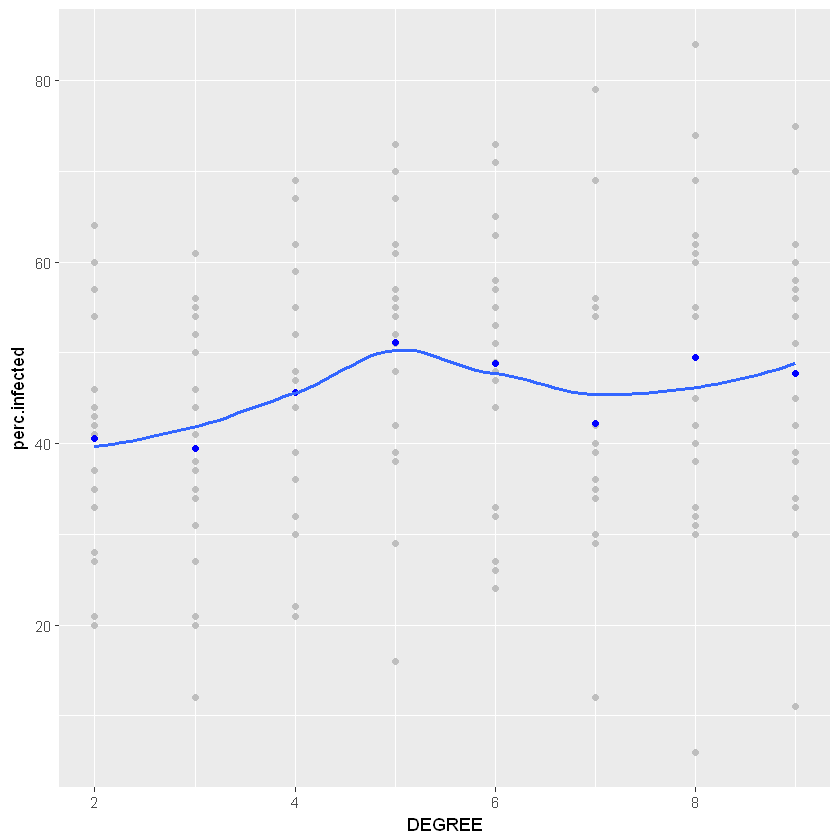

In [39]:
ggplot(DEGREE_RUNS, aes(x=DEGREE, y=perc.infected)) + geom_point(color="gray") + geom_point(data=DEGREE_GROUP, mapping=aes(x=DEGREE, y=mean_20), color="blue") + geom_smooth(se=FALSE)

How many friends each turtles has does not affect the overall percentage of turtles with the disease.

### EVOLUTION-INTERVAL

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


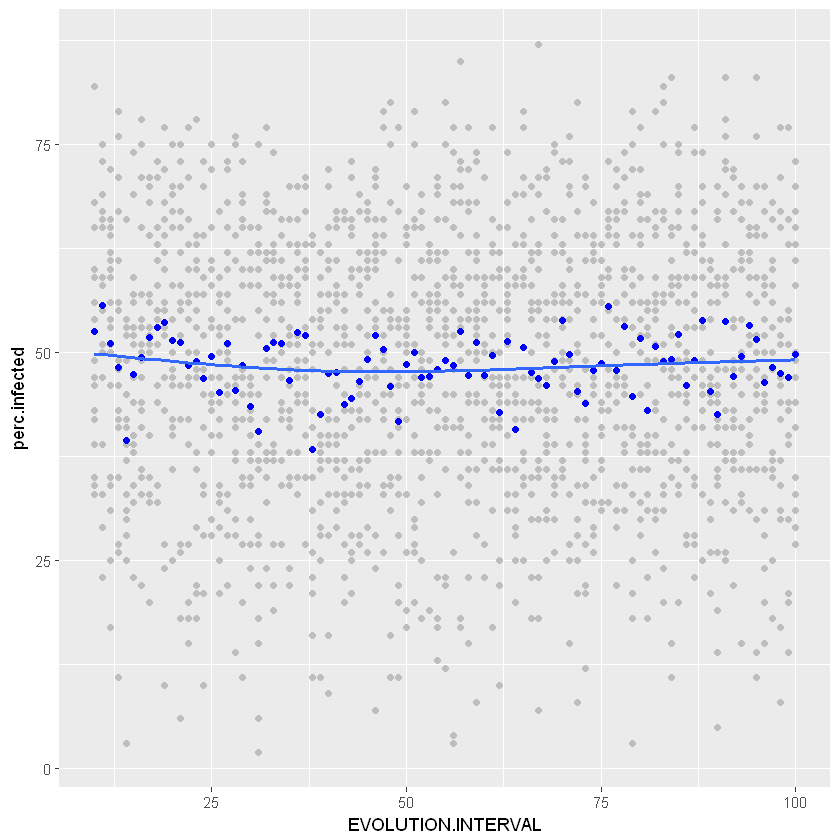

In [44]:
ggplot(EVOLUTION_INT_RUNS, aes(x=EVOLUTION.INTERVAL, y=perc.infected)) + geom_point(color="gray") + geom_point(data=EVOLUTION_INT_GROUP, mapping=aes(x=EVOLUTION.INTERVAL, y=mean_20), color="blue") + geom_smooth(se=FALSE)

How often the network changes does not effect the overall percentage of turtles that get the disease with the other settings as is.

### EVOLUTION-PROB

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


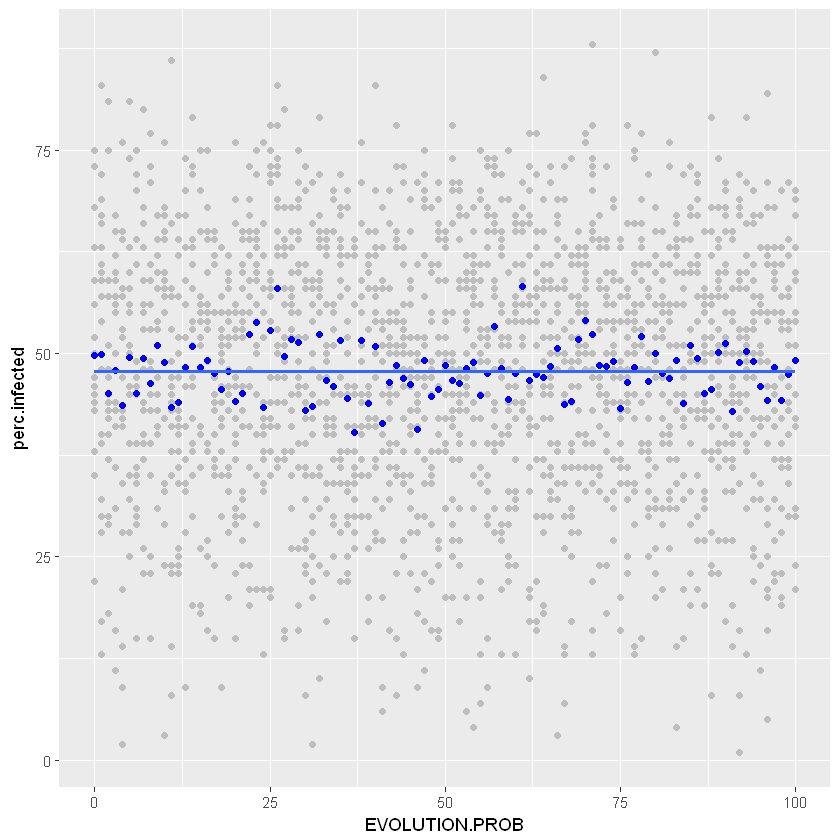

In [46]:
ggplot(EVOLUTION_PROB_RUNS, aes(x=EVOLUTION.PROB, y=perc.infected)) + geom_point(color="gray") + geom_point(data=EVOLUTION_PROB_GROUP, mapping=aes(x=EVOLUTION.PROB, y=mean_20), color="blue") + geom_smooth(se=FALSE)

How often the network changes does not effect the overall percentage of turtles that get the disease with the other settings as is.

## Problem 4

<img src="tx-prob.png">

## Problem 5

In [52]:
ACUTE_RUNS <- read.csv('EX_ACUTE.csv', skip=6, header=TRUE)
ACUTE_GROUP <- ACUTE_RUNS %>%
  group_by(ACUTE.PHASE.DURATION) %>%
  summarise(
    mean_20 = mean(perc.infected)
  )

### Acute Phase

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


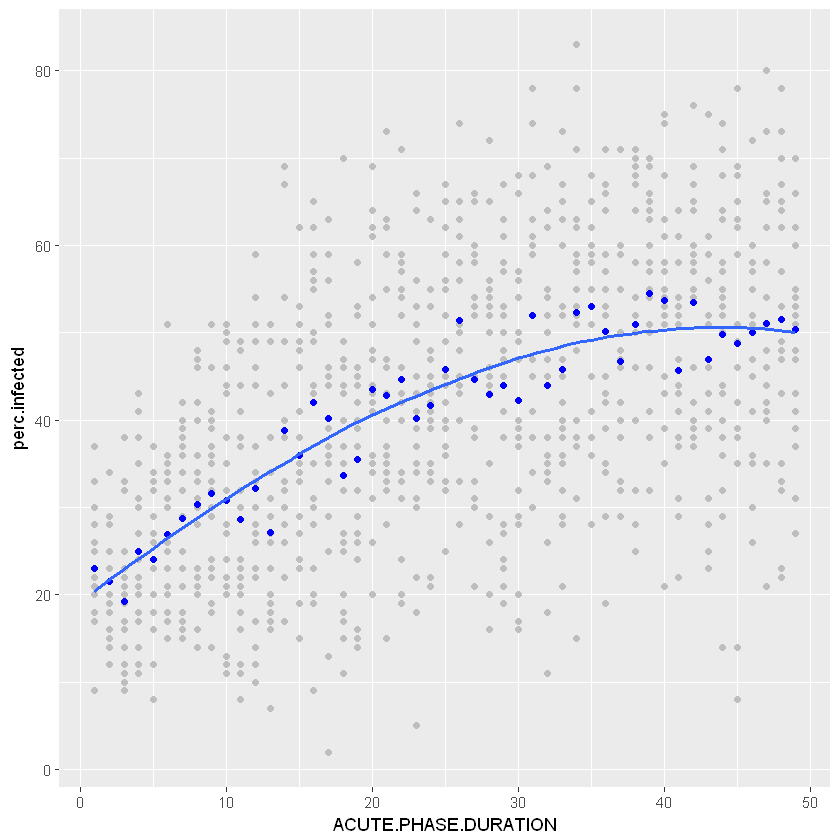

In [54]:
ggplot(ACUTE_RUNS, aes(x=ACUTE.PHASE.DURATION, y=perc.infected)) + geom_point(color="gray") + geom_point(data=ACUTE_GROUP, mapping=aes(x=ACUTE.PHASE.DURATION, y=mean_20), color="blue") + geom_smooth(se=FALSE)

When the actute phase is the same length as the simulation itself (39) it will have no effect. Until then, the disease is much more contained.

## Problem 6

Stopping here for the day. Thoughts... Is my time_limit off? The default interval makes no sense if only 39 ticks to 50 percent? 